Text(0,0.5,'Cumulative Frequency')

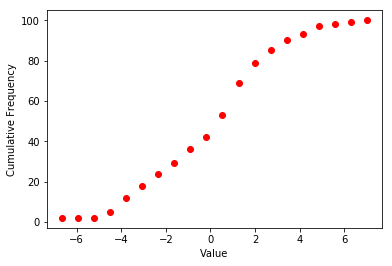

In [121]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

# 100 values from a normal distribution with a std of 3 and a mean of 0.5
data = 3.0 * np.random.randn(100) + 0.5

counts, start, dx, _ = scipy.stats.cumfreq(data, numbins=20)
x = np.arange(counts.size) * dx + start

plt.plot(x, counts, 'ro')
plt.xlabel('Value')
plt.ylabel('Cumulative Frequency')


In [119]:
# -*- coding: utf-8 -*-
from requests_html import HTMLSession
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

url = 'http://opendata2.epa.gov.tw/UV/UV.json'
r = requests.get(url)
#利用json.loads()解碼JSON
reqsjson = json.loads(r.text)

#利用迴圈儲存地方紫外線數值
Sitename = {'淡水':0, '板橋':0, '桃園':0, '苗栗':0, '沙鹿':0, '彰化':0, '南投':0, '斗六':0, 
            '塔塔加':0, '朴子':0, '新營':0, '橋頭':0, '屏東':0, '嘉義':0, '臺中':0, '澎湖':0,
            '宜蘭':0, '金門':0, '日月潭':0, '臺東':0, '蘭嶼':0, '新屋':0, '基隆':0, '成功':0, 
            '臺北':0, '恆春':0, '鞍部':0, '新竹':0, '臺南':0, '玉山':0, '高雄':0, '馬祖':0, '花蓮':0}
County = []
PublishAgency = []
PublishTime = []
Latitude = []
Longitude = []
for content in reqsjson:
    if (content['UVI']==''):
        pass
    else:
        Sitename[content['SiteName']]+= float(content['UVI'])
        County.append(content['County'])
        PublishAgency.append(content['PublishAgency'])
        PublishTime.append(content['PublishTime'])
        Latitude.append(content['WGS84Lat'])
        Longitude.append(content['WGS84Lon'])
#利用plt畫長條圖表      
Site = ['Tamsui', 'Banqiao', 'Taoyuan', 'Miaoli', 'Shalu', 'Changhua', 'Nantou', 'Douliu',
         'Tatajia', 'Puzi', 'Xinying', 'Qiaotou', 'Pingtung', 'Chiayi', 'Taizhong', 'Penghu',
         'Yilan', 'Kinmen', 'Sun Moon Lake', 'Taitung', 'Lanyu', 'Xinwu', 'Keelung', 'Chenggung',
         'Taipei', 'Hengchun', 'Anbu', 'Hsinchu', 'Tainan', 'Mt. Jade', 'Kaohsiung', 'Matsu',
         'Hualien']
Uvi=[]
for key in Sitename.items():
    Uvi.append(key[1])

df=pd.DataFrame({'Country' : County,
                 'Publish Agency' : PublishAgency,
                 'Publish Time' : PublishTime,
                 'Site Name' : Site,
                 'UVI' : Uvi,
                 'Latitude' : Latitude,
                 'Longitude' : Longitude})

In [120]:
df.head()

,Country,Publish Agency,Publish Time,Site Name,UVI,Latitude,Longitude
0,新北市,環境保護署,2018-07-27 23:00,Tamsui,0.0,"25,09,52.20","121,26,57.26"
1,新北市,環境保護署,2018-07-27 23:00,Banqiao,0.0,"25,00,46.7","121,27,31.2"
2,桃園市,環境保護署,2018-07-27 23:00,Taoyuan,0.0,"24,59,12.40","121,18,31.40"
3,苗栗縣,環境保護署,2018-07-27 23:00,Miaoli,0.0,"24,33,54.97","120,49,12.72"
4,臺中市,環境保護署,2018-07-27 23:00,Shalu,0.0,"24,13,32.26","120,34,7.66"


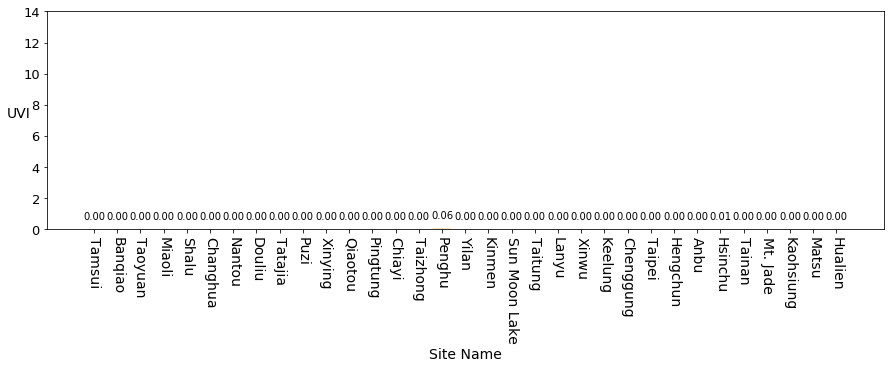

In [105]:
plt.figure(figsize=(15,4))
plt.bar(site ,uvi, color='moccasin')

plt.xticks(fontsize=14, rotation=270)
plt.yticks( range(0, 16, 2),fontsize=13)

plt.xlabel('Site Name', fontsize=14)
plt.ylabel('UVI', fontsize=14, rotation=0)

for x,y in zip(site,uvi):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x,y+0.5,'%.2f'%y,ha='center',va='bottom')
plt.show()